In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.path import Path

In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt

def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0 , 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0

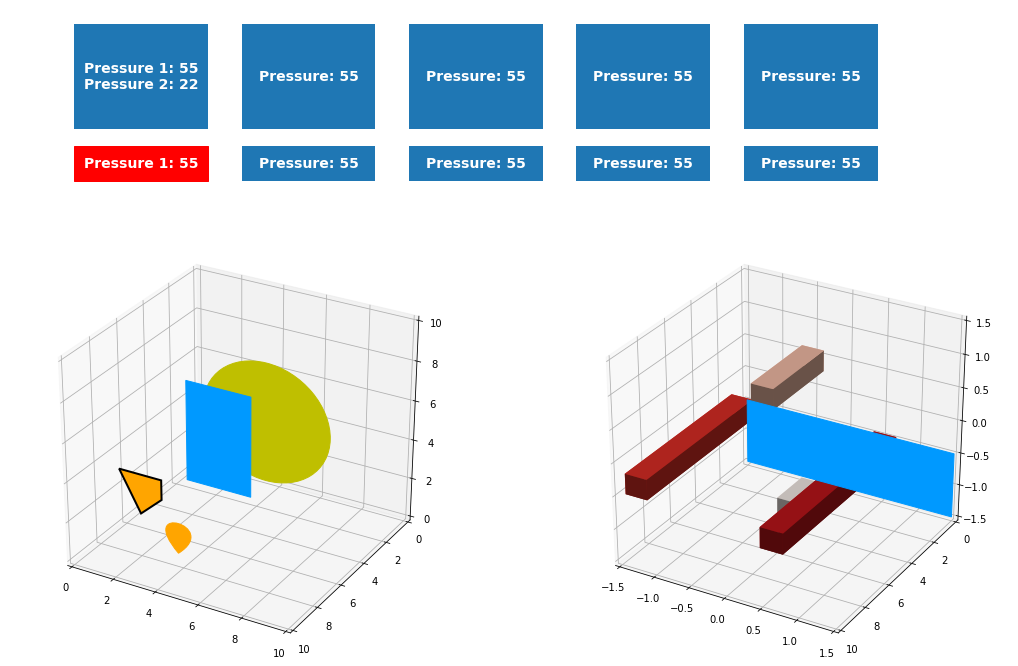

In [70]:
fig = plt.figure(figsize=(18,12))

gs = fig.add_gridspec(3, 2)




##################################


ax1 = fig.add_subplot(gs[0, :])

rectangles = {'Info1' : mpl.patches.Rectangle((2,1), 4, 2, color='red'),
              'Info2'  : mpl.patches.Rectangle((2,4), 4, 6),
              'Info3'   : mpl.patches.Rectangle((7,1), 4, 2),
              'Info4'  : mpl.patches.Rectangle((7,4), 4, 6),
              'Info5' : mpl.patches.Rectangle((12,1), 4, 2),
              'Info6'  : mpl.patches.Rectangle((12,4), 4, 6),
              'Info7'   : mpl.patches.Rectangle((17,1), 4, 2),
              'Info8'  : mpl.patches.Rectangle((17,4), 4, 6),
              'Info9'   : mpl.patches.Rectangle((22,1), 4, 2),
              'Info10'  : mpl.patches.Rectangle((22,4), 4, 6),
             }


dict1 = {'Info1': 'Pressure 1: {}'.format(55),
         'Info2': 'Pressure 1: {}\nPressure 2: {}'.format(55,22),
         'Info3': 'Pressure: {}'.format(55),
         'Info4': 'Pressure: {}'.format(55),
         'Info5': 'Pressure: {}'.format(55),
         'Info6': 'Pressure: {}'.format(55),
         'Info7': 'Pressure: {}'.format(55),
         'Info8': 'Pressure: {}'.format(55),
         'Info9': 'Pressure: {}'.format(55),
         'Info10': 'Pressure: {}'.format(55), 
        }





for r in rectangles:
    ax1.add_artist(rectangles[r])
    rx, ry = rectangles[r].get_xy()
    cx = rx + rectangles[r].get_width()/2.0
    cy = ry + rectangles[r].get_height()/2.0

    ax1.annotate(dict1[r], (cx, cy), color='w', weight='bold', 
                fontsize=14, ha='center', va='center')

ax1.set_xlim((0, 30))
ax1.set_ylim((0, 11))
# ax1.set_aspect('equal')

ax1.axis('off')



############################################   SECONDA GRAFICO



# ax = fig.add_subplot(312, gridspec_kw={'width_ratios': [2, 1]}, projection='3d')
# ax = fig.add_subplot(212, projection='3d')

ax = fig.add_subplot(gs[1:, :1], projection='3d')

p = Circle((5, 5), 3, color='y')
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=3, zdir="y")


rect3 = mpl.patches.Rectangle((3,3), 3, 5, color='#0099FF')
ax.add_patch(rect3)
art3d.pathpatch_2d_to_3d(rect3, z=6, zdir="y")

############

verts = [
    (2, 2), # left, bottom
    (3, 3), # left, top
    (3, 4), # right, top
    (1, 4), # right, bottom
    (2, 2), # ignored
    ]
codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]
path_comm = Path(verts, codes)
patch = mpl.patches.PathPatch(path_comm, facecolor='orange', lw=2)
ax.add_patch(patch)
art3d.pathpatch_2d_to_3d(patch, z=8, zdir="y")

############

verts = [
    (5, 2), # left, bottom
    (7, 4), # left, top
    (3, 4), # right, top
    (5, 2), # right, bottom
    (5, 2), # ignored
    ]
codes = [Path.MOVETO,
         Path.CURVE4,
         Path.LINETO,
         Path.CURVE4,
         Path.CLOSEPOLY,
         ]
path_comm = Path(verts, codes)
patch = mpl.patches.PathPatch(path_comm, color='orange')  # color= with no boundary facecolor= withboundary
ax.add_patch(patch)
art3d.pathpatch_2d_to_3d(patch, z=10, zdir="y")


#################


ax.set_xlim(0, 10)
ax.set_ylim(10, 0)
ax.set_zlim(0, 10)

###############################################################         TERZO GRAFICO

ax2 = fig.add_subplot(gs[1:, 1:], projection='3d')


xpos = np.array([-1,0,1,0])
ypos = np.array([0,-1,0,1])
zpos = np.full_like(xpos, 4)

dx = np.full_like(xpos, 0.3, dtype='f')
dy = np.full_like(xpos, 0.3, dtype='f')
dz = np.array([8,2,9,4])

from matplotlib import cm
cmap = cm.get_cmap('Reds') # Get desired colormap - you can change this! 'jet'
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 



ax2.bar3d(xpos, zpos, ypos, dx, dz, dy, color=rgba, zsort='average')

rect4 = mpl.patches.Rectangle((-1.5,-1.5), 3, 1, color='#0099FF')
ax2.add_patch(rect4)
art3d.pathpatch_2d_to_3d(rect4, z=0, zdir="y")



ax2.set_xlim(-1.5, 1.5)
ax2.set_zlim(-1.5, 1.5)
ax2.set_ylim(10, 0)






###################################################  END


plt.show()





In [41]:
xpos, ypos, zpos, dx, dy, dz

(array([-1,  0,  1,  0]),
 array([ 0, -1,  0,  1]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([1, 2, 3, 4]))

In [3]:
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)



(0, 10)

ValueError: Argument Z must be 2-dimensional.

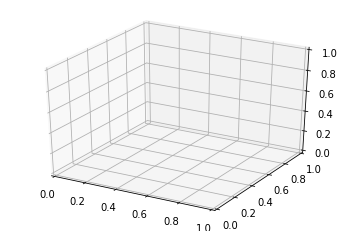

In [9]:
R = np.linspace(0, 5, 100)
h = np.linspace(0, 1, 100)
u = np.linspace(0,  2*np.pi, 100)

x = np.outer(R, np.cos(u))
y = np.outer(R, np.sin(u))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,h) # z in case of disk which is parallel to XY plane is constant and you can directly use h
fig.show()

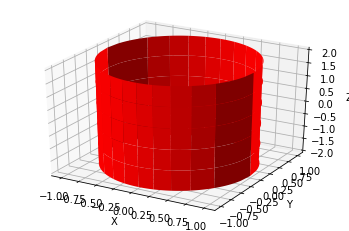

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Cylinder
x=np.linspace(-1, 1, 100)
z=np.linspace(-2, 2, 100)
Xc, Zc=np.meshgrid(x, z)
Yc = np.sqrt(1-Xc**2)

# Draw parameters
rstride = 20
cstride = 10
ax.plot_surface(Xc, Yc, Zc, alpha=1, rstride=rstride, cstride=cstride, color='red')
ax.plot_surface(Xc, -Yc, Zc, alpha=1, rstride=rstride, cstride=cstride, color='red')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

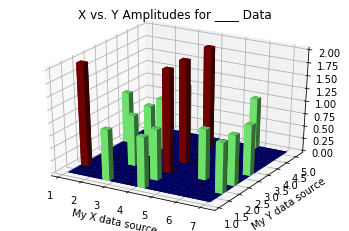

In [51]:
xAmplitudes = [1,2,2,3,4,5,6,7,3,4,3,3,4,2,2,1,3,4,5,6,7]
yAmplitudes = [3,5,3,4,5,1,3,4,5,3,3,2,2,1,1,2,3,3,2,3,2]

x = np.array(xAmplitudes)   #turn x,y data into numpy arrays
y = np.array(yAmplitudes)

fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

#make histogram stuff - set bins - I choose 20x20 because I have a lot of data
hist, xedges, yedges = np.histogram2d(x, y, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for ____ Data")
plt.xlabel("My X data source")
plt.ylabel("My Y data source")
plt.savefig("Your_title_goes_here")

plt.show()